# BODY SHAMING TWEET ANALYSIS

**Importing the dependencies**

In [40]:
import pandas as pd
import numpy as np
np.random.seed(2018)
import matplotlib.pyplot as plt
from os import path
import re
from PIL import Image

import nltk
nltk.download('wordnet')
from nltk.stem import *
from nltk.stem.porter import *
import nltk.stem as stemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sihus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Creating and analysing a dataframe**

In [41]:
#read the csv file
df = pd.read_csv('tweets.csv',encoding='latin-1',header=None)

In [42]:
#display the first 10 entries
df.head(10)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [43]:
#renaming the columns
df = df.rename(columns = {0: 'polarity', 1: 'IDs', 2: 'date', 3: 'flag', 4: 'username', 5: 'tweet'})

In [44]:
#display the new dataframe
df.head()

,polarity,IDs,date,flag,username,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [45]:
#dataset shape
df.shape

(1600000, 6)

In [46]:
#dataset info
df.info

<bound method DataFrame.info of          polarity         IDs                          date      flag  \
0               0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1               0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2               0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3               0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4               0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
...           ...         ...                           ...       ...   
1599995         4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996         4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997         4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998         4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599999         4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

                username                                              tweet  
0        _The

**Data Preprocessing**

In [47]:
#creating a new column corresponding to tweet column,having string datatype
df['new_tweet'] = df['tweet'].astype(str)

In [48]:
df.head()

,polarity,IDs,date,flag,username,tweet,new_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...","@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....","@nationwideclass no, it's not behaving at all...."


In [49]:
#removing special symbols
df['new_tweet'] =  df['new_tweet'].apply(lambda x: re.sub(r'[^a-zA-Z\s\t]+', "", str(x)))

In [50]:
df.head()

,polarity,IDs,date,flag,username,tweet,new_tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccomyzl Awww thats a bum...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,is upset that he cant update his Facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Kenichan I dived many times for the ball Manag...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass no its not behaving at all im ...


In [53]:
tweet = df['new_tweet']

**Data analysis and visualisation**

In [54]:
#generating a word cloud
wc = WordCloud().generate(" ".join(tweet))

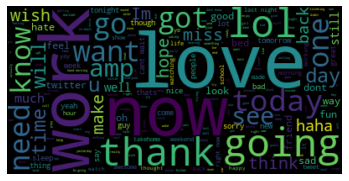

In [55]:
#displaying the word cloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [56]:
#defining the vocabulary

vcb = ['ugly', 'fat', 'body', 'dark', 'heavy', 'jiggle', 'short', 'tall', 'skinny', 'skin']

In [57]:
#function for checking vcb words in the tweets
def check(tweet):
    words = tweet.split(' ')
    for word in words:
        if word in vcb:
            return 1
    return 0


In [ ]:
data['vocab'] = data['text_2'].map(text_contains_my_vocab)